__HOMEWORK 6: LOGISTIC REGRESSION__

Full name: Nguyễn Thị Minh Ngọc
<br>
Student ID: 11219280
<br>
Class: DSEB 63

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Problem 2

In [2]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    x = np.array(data.iloc[:, :-1])
    y = np.array(data.iloc[:, -1])
    return x, y

__a. Implement logistic regression algorithm__

In [15]:
class LogisticRegression:
    def __init__(self):
        self.w = None
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x.dot(self.w)))
    
    def scaler(self, x):
        scaler = MinMaxScaler()
        return scaler.fit_transform(x)
        
    def add_ones(self, x):
        return np.c_[np.ones(x.shape[0]), x]
        
    def fit(self, x, y, learn_rate=0.01, max_steps=1000, scaler=False):
        if scaler:
            x = self.scaler(x)
        x = self.add_ones(x)
        self.w = np.random.rand(x.shape[1])
        
        for i in range(max_steps):
            gradient = x.T.dot(self.sigmoid(x) - y)
            step_size = gradient * learn_rate
            self.w -= step_size
        return self.w
    
    def predict(self, x, dec_bound=0.5, scaler=False, boundary=0.5):
        if scaler:
            x = self.scaler(x)
        x = self.add_ones(x)
        sigmoid = self.sigmoid(x)
        return np.array(sigmoid>=boundary, dtype='int')
    
    def plot(self, x, y, boundary=0.5):
        # scaling x for better visualization
        x = self.scaler(x)
        
        # define the boudary line
        x1_line = x[:, 0]
        a = -np.log(1/boundary - 1)
        print(a)
        x1_line = np.linspace(min(x1_line), max(x1_line))
        w0, w1, w2 = self.w
        x2_line = (-w1/w2)*x1_line - w0/w2 + a
        
        # visualization
        plt.plot(x1_line, x2_line, color='green')
        plt.scatter(x=x[:, 0], y=x[:, 1], c=y)
        plt.show()

__b. Fit your model in the attached train dataset__

In [16]:
x_train, y_train = load_data("Data/ds1_train.csv")

# fit the model
lg = LogisticRegression()
w = lg.fit(x_train, y_train, scaler=True)
print("w =", w)

w = [ -7.15870284  17.4998662  -25.03205277]


-0.4054651081081644


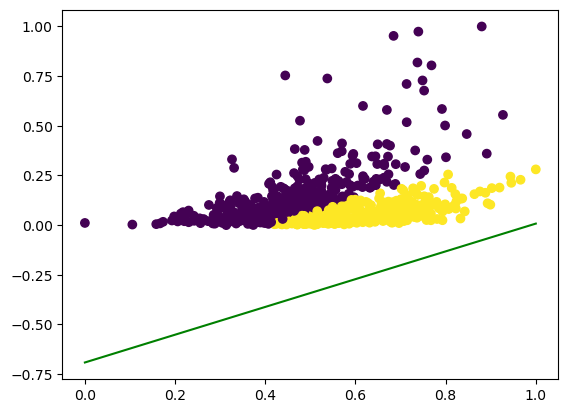

In [22]:
test = lg.predict(x_train, boundary=0.5, scaler=True)
lg.plot(x_train, test, boundary=0.4)

__Visualize the classification result on test data with decision boundary 0.5__

-0.0


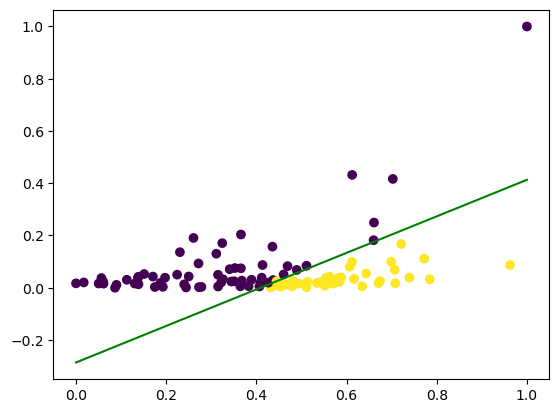

In [6]:
x_test, y_test = load_data("Data/ds1_valid.csv")

y_predict = lg.predict(x_test, boundary=0.5, scaler=True)
lg.plot(x_test, y_predict, boundary=0.5)

__Calculate the accuracy score on your prediction__

In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy Score =", accuracy)

Accuracy Score = 0.83


### JUST FOR FUN

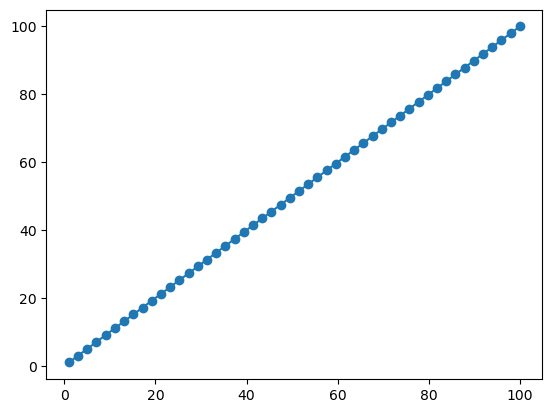

In [9]:
x_line = np.linspace(1, 100)
y_line = x_line
plt.scatter(x_line, y_line)
plt.plot(x_line, y_line)

In [10]:
def them_cot_mot(x):
    x_1 = np.hstack((np.ones((x.shape[0],1)),x))
    return x_1

def sigmoid(z):
    return 1/(1 + np.exp(-z))

class Logistic:
    def __init__(self):
        self.x = None
        self.y = None
        self.w = None
    
    def fit(self,x, y):
        learning_rate = 0.01
        self.x = them_cot_mot(x)
        self.w = np.zeros(self.x.shape[1])
        itera = 1000
        self.y = y
        for i in range(1,itera):
            y_pred = sigmoid(np.dot(self.x,self.w))
            gradient = np.dot(self.x.T,(y_pred - self.y))
            self.w = self.w - learning_rate * gradient
        return self.w
    
    def predict(self,x):
        x = them_cot_mot(x)
        xTw = np.dot(x,self.w)
        if (sigmoid(xTw)).any() >= 0.5:
            return 1
        else:
            return 0
    
    def plot(self):
        plt.scatter(self.x[self.y == 0,1], self.x[self.y == 0, 2], c = 'blue', label = 'y = 0')
        plt.scatter(self.x[self.y == 1,1], self.x[self.y == 1, 2], c = 'red', label = 'y = 1')
        plt.legend()
        plt.xlabel('x_1')
        plt.ylabel('x_2')
        
        #decision boundary
        xkeke = np.arange(np.min(self.x[:,1]),np.max(self.x[:,1]), 0.01)
        ykeke = - ((self.w[0]/self.w[2]) + ((self.w[1]/self.w[2]) * xkeke))
        plt.plot(xkeke,ykeke, c = 'green')
        plt.show()

In [11]:
x_train, y_train = load_data("Data/ds1_train.csv")

# fit the model
lg = Logistic()
w = lg.fit(x_train, y_train)
print("w =", w)

w = [   8.03225601 2203.58034901  -93.02132811]


C:\Users\Admin\AppData\Local\Temp\ipykernel_16204\2655892376.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


In [12]:
x_test, y_test = load_data("Data/ds1_valid.csv")

y_predict = lg.predict(x_test)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16204\2655892376.py:6: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


In [13]:
x_test[0].shape

(2,)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
plt.rc('text', usetex=True)

pts = np.loadtxt('Data/linpts.txt')
X = pts[:,:2]
Y = pts[:,2].astype('int')

# Fit the data to a logistic regression model.
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X, Y)

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X[Y==0].T, s=8, alpha=0.5)
plt.scatter(*X[Y==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
plt.rc('text', usetex=True)

pts = np.loadtxt('Data/linpts.txt')
X = pts[:,:2]
Y = pts[:,2].astype('int')

# Fit the data to a logistic regression model.
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X, Y)

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
# plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
# plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>